In [80]:
import pandas as pd
pd.set_option('Display.max_columns', None)
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('EXPERT_COMPTABLE_AVANT_DERNIER.csv')

In [82]:
df

,First Name,Last Name,contact_type,age,date_de_naissance,linkedin_profil_url,company_name,web_site,industry,adresse,city,Postal Code,nb_employe (pappers),nb_employe (linkedin),CA,resultat_net,linkedin_company_url,ebitda,nb_EC,papers_link,telephone
0,Claude,Boulic,Accountant,56.0,12/1967,NaN,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
1,Severine,Ferreira,Accountant,45.0,09/1978,https://www.linkedin.com/in/s%C3%A9verine-oill...,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
2,Stephane,Delzaive,Accountant,49.0,09/1974,NaN,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
3,Enis,Dzogovic,Accountant,42.0,12/1981,https://www.linkedin.com/in/enis-dzogovic-4645...,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
4,Sandra,Faoro,Accountant,52.0,02/1972,NaN,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,Méline,Trinh,Accountant,40.0,10/1983,NaN,TF EXPERTISE,NaN,Accounting,"171 AV DU GENERAL LECLERC, 94700 MAISONS-ALFORT",MAISONS-ALFORT,94700.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/tf-expertise...,06 21 38 35 94
14602,Redouan,Bensaid,Accountant,30.0,01/1994,NaN,MNA CONSULTING,NaN,Accounting,"BUREAU 3, 6 RUE DES BATELIERS, 92110 CLICHY",CLICHY,92110.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/mna-consulti...,06 63 24 00 64
14603,Alix,Tissandier,Accountant,29.0,07/1994,NaN,HOLDAT,NaN,Accounting,"4 PL BARTHELEMY NIOLLON, 13100 AIX-EN-PROVENCE",AIX-EN-PROVENCE,13100.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/holdat-98503...,06 26 46 84 30
14604,Barbara,Bruel,Accountant,31.0,01/1993,https://www.linkedin.com/in/barbara-bruel?mini...,CABINET BRUEL,NaN,Accounting,"7 AV DE LAMBALLE, 75016 PARIS 16",PARIS,75016.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/cabinet-brue...,06 65 72 99 94


In [83]:
def percentage_ebitda(x,y):
    return (y*100/x)

df['EBITDA %'] = percentage_ebitda(df['CA'],df['ebitda'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   First Name             14606 non-null  object 
 1   Last Name              14606 non-null  object 
 2   contact_type           14606 non-null  object 
 3   age                    14601 non-null  float64
 4   date_de_naissance      14601 non-null  object 
 5   linkedin_profil_url    5282 non-null   object 
 6   company_name           14606 non-null  object 
 7   web_site               3952 non-null   object 
 8   industry               14606 non-null  object 
 9   adresse                14606 non-null  object 
 10  city                   14601 non-null  object 
 11  Postal Code            14601 non-null  float64
 12  nb_employe (pappers)   14606 non-null  object 
 13  nb_employe (linkedin)  4889 non-null   object 
 14  CA                     4610 non-null   float64
 15  re

In [85]:
test = df[['age','city','nb_employe (pappers)','nb_EC','EBITDA %']]

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   14601 non-null  float64
 1   city                  14601 non-null  object 
 2   nb_employe (pappers)  14606 non-null  object 
 3   nb_EC                 14541 non-null  float64
 4   EBITDA %              4608 non-null   float64
dtypes: float64(3), object(2)
memory usage: 570.7+ KB


In [87]:
test.dropna(inplace=True)

/var/folders/rq/gbrjppds5pzc_g5hjfc4wvfc0000gn/T/ipykernel_53016/2920511254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577 entries, 0 to 13969
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4577 non-null   float64
 1   city                  4577 non-null   object 
 2   nb_employe (pappers)  4577 non-null   object 
 3   nb_EC                 4577 non-null   float64
 4   EBITDA %              4577 non-null   float64
dtypes: float64(3), object(2)
memory usage: 214.5+ KB


In [89]:
import re

def moyenne_nombre_employes(text):
    # Utiliser une expression régulière pour trouver tous les nombres dans le texte
    nombres = re.findall(r'\d+', text)
    
    # Convertir les résultats de texte à entier
    nombres = [int(n) for n in nombres]
    
    # Calculer la moyenne si on a exactement deux nombres
    if len(nombres) == 2:
        return sum(nombres) / 2
    else:
        return nombres[0]

In [90]:
test['estimation employe'] = test['nb_employe (pappers)'].apply(moyenne_nombre_employes)

/var/folders/rq/gbrjppds5pzc_g5hjfc4wvfc0000gn/T/ipykernel_53016/540904325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['estimation employe'] = test['nb_employe (pappers)'].apply(moyenne_nombre_employes)


In [91]:
test

,age,city,nb_employe (pappers),nb_EC,EBITDA %,estimation employe
0,56.0,AHUY,Entre 20 et 49 salariés,1.0,5.342020,34.5
1,45.0,AHUY,Entre 20 et 49 salariés,1.0,5.342020,34.5
2,49.0,AHUY,Entre 20 et 49 salariés,1.0,5.342020,34.5
3,42.0,AHUY,Entre 20 et 49 salariés,1.0,5.342020,34.5
4,52.0,AHUY,Entre 20 et 49 salariés,1.0,5.342020,34.5
...,...,...,...,...,...,...
13963,51.0,LYON,Entre 6 et 9 salariés,2.0,16.315789,7.5
13964,54.0,PARIS,Entre 6 et 9 salariés,4.0,5.430712,7.5
13965,57.0,LYON,Entre 6 et 9 salariés,2.0,-6.516613,7.5
13968,86.0,LYON,Entre 3 et 5 salariés,1.0,0.350515,4.0


In [93]:
test.drop(columns='nb_employe (pappers)', inplace=True)

/var/folders/rq/gbrjppds5pzc_g5hjfc4wvfc0000gn/T/ipykernel_53016/2365801921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='nb_employe (pappers)', inplace=True)


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['city_encoded'] = le.fit_transform(test['city'])

/var/folders/rq/gbrjppds5pzc_g5hjfc4wvfc0000gn/T/ipykernel_53016/1170896516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['city_encoded'] = le.fit_transform(test['city'])


In [95]:
y = test['EBITDA %']

In [96]:
x = test.drop(columns=['EBITDA %','city'])

In [97]:
x

,age,nb_EC,estimation employe,city_encoded
0,56.0,1.0,34.5,3
1,45.0,1.0,34.5,3
2,49.0,1.0,34.5,3
3,42.0,1.0,34.5,3
4,52.0,1.0,34.5,3
...,...,...,...,...
13963,51.0,2.0,7.5,493
13964,54.0,4.0,7.5,618
13965,57.0,2.0,7.5,493
13968,86.0,1.0,4.0,493


In [98]:
# convert type in numeric

x = x.astype('float64')

In [99]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577 entries, 0 to 13969
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4577 non-null   float64
 1   nb_EC               4577 non-null   float64
 2   estimation employe  4577 non-null   float64
 3   city_encoded        4577 non-null   float64
dtypes: float64(4)
memory usage: 178.8 KB


In [100]:
x.to_csv('data_clean.csv', index=False)

# KMEANS

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

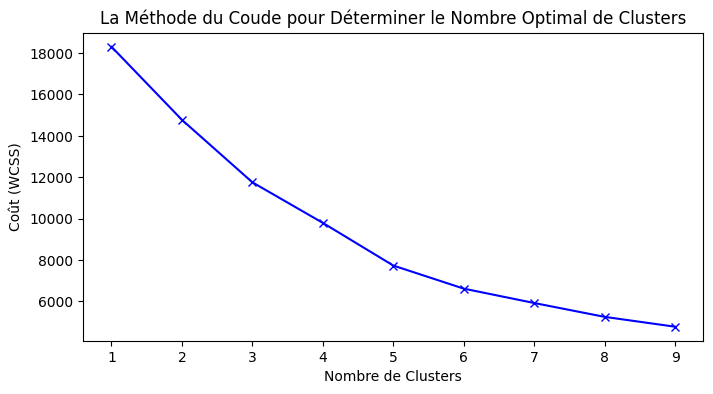

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supposons que 'x' est déjà chargé avec vos données
# Standardisation des données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Calcul du coût pour différents nombres de clusters
costs = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    # Le coût est le WCSS (Within-Cluster Sum of Square)
    costs.append(kmeans.inertia_)

# Visualisation des coûts
plt.figure(figsize=(8, 4))
plt.plot(K, costs, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Coût (WCSS)')
plt.title('La Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.show()


In [102]:
# kmeans with 5 clusters

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(x_scaled)
clusters_kmeans = kmeans.predict(x_scaled)
test['cluster'] = clusters_kmeans


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/rq/gbrjppds5pzc_g5hjfc4wvfc0000gn/T/ipykernel_53016/2622277201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cluster'] = clusters_kmeans


In [103]:
test['cluster'].value_counts()

cluster
2    1686
0    1413
4    1138
3     183
1     157
Name: count, dtype: int64

In [104]:
test

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
0,56.0,AHUY,1.0,5.342020,34.5,3,4
1,45.0,AHUY,1.0,5.342020,34.5,3,4
2,49.0,AHUY,1.0,5.342020,34.5,3,4
3,42.0,AHUY,1.0,5.342020,34.5,3,4
4,52.0,AHUY,1.0,5.342020,34.5,3,4
...,...,...,...,...,...,...,...
13963,51.0,LYON,2.0,16.315789,7.5,493,0
13964,54.0,PARIS,4.0,5.430712,7.5,618,2
13965,57.0,LYON,2.0,-6.516613,7.5,493,2
13968,86.0,LYON,1.0,0.350515,4.0,493,2


# KMEANS prototypes

In [342]:
from kmodes.kprototypes import KPrototypes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 306270949.2716069
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 306270949.2716069
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 306270949.2716069
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 306270949.2716069
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 306270949.2716069
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 306270949.2716069
Init: initializing centroids
Init: initializing clusters
Starting iterations..

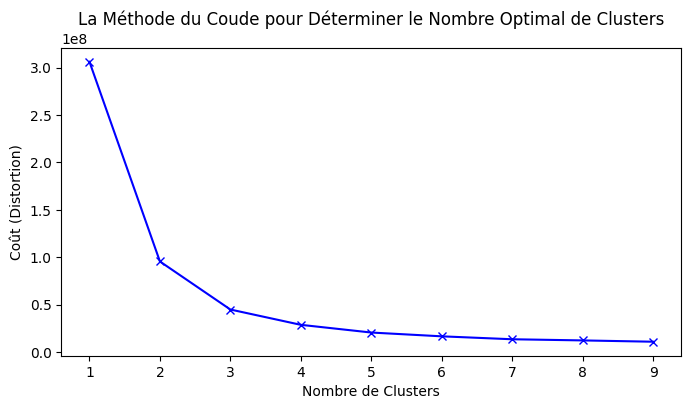

In [343]:
costs = []
K = range(1, 10)  
x['city_encoded'] = x['city_encoded'].astype(int).astype('category')
x_array = x.values
categorical_indices= [1]

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=1)
    kproto.fit_predict(x_array, categorical=categorical_indices)
    costs.append(kproto.cost_)

# Visualisation des coûts
plt.figure(figsize=(8, 4))
plt.plot(K, costs, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Coût (Distortion)')
plt.title('La Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.show()

In [403]:
categorical_indices = [1]  
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters_prototype = kproto.fit_predict(x_array, categorical=categorical_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...


Run: 1, iteration: 1/100, moves: 1503, ncost: 44834599.06194322
Run: 1, iteration: 2/100, moves: 69, ncost: 44710221.7257893
Run: 1, iteration: 3/100, moves: 6, ncost: 44709607.97279338
Run: 1, iteration: 4/100, moves: 0, ncost: 44709607.97279338
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 325, ncost: 55503006.15719661
Run: 2, iteration: 2/100, moves: 275, ncost: 53936630.57465845
Run: 2, iteration: 3/100, moves: 124, ncost: 53650381.225501254
Run: 2, iteration: 4/100, moves: 49, ncost: 53607363.15460996
Run: 2, iteration: 5/100, moves: 14, ncost: 53603443.85729714
Run: 2, iteration: 6/100, moves: 1, ncost: 53603397.59447501
Run: 2, iteration: 7/100, moves: 0, ncost: 53603397.59447501
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 431, ncost: 53625932.27985405
Run: 3, iteration: 2/100, moves: 49, ncost: 53604028.03181098
Run: 3, iteration: 3/100, moves:

In [404]:
print("Centres des Clusters:\n", kproto.cluster_centroids_)
print("Affectations des clusters:", clusters_prototype)

Centres des Clusters:
 [[ 51.45315488  23.7289675  826.08891013   1.        ]
 [ 52.73403787  14.54997798 554.65962131   1.        ]
 [ 52.66031746  18.31269841 162.13809524   1.        ]]
Affectations des clusters: [2 2 2 ... 1 1 2]


In [79]:
test['cluster'] = clusters_prototype

NameError: name 'clusters_prototype' is not defined

In [406]:
test['cluster'].value_counts()

cluster
1    2271
2    1260
0    1046
Name: count, dtype: int64

In [401]:
test

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
0,56.0,AHUY,1.0,5.342020,34.5,3,0
1,45.0,AHUY,1.0,5.342020,34.5,3,0
2,49.0,AHUY,1.0,5.342020,34.5,3,0
3,42.0,AHUY,1.0,5.342020,34.5,3,0
4,52.0,AHUY,1.0,5.342020,34.5,3,0
...,...,...,...,...,...,...,...
13963,51.0,LYON,2.0,16.315789,7.5,493,2
13964,54.0,PARIS,4.0,5.430712,7.5,618,2
13965,57.0,LYON,2.0,-6.516613,7.5,493,2
13968,86.0,LYON,1.0,0.350515,4.0,493,2


# DBSCAN

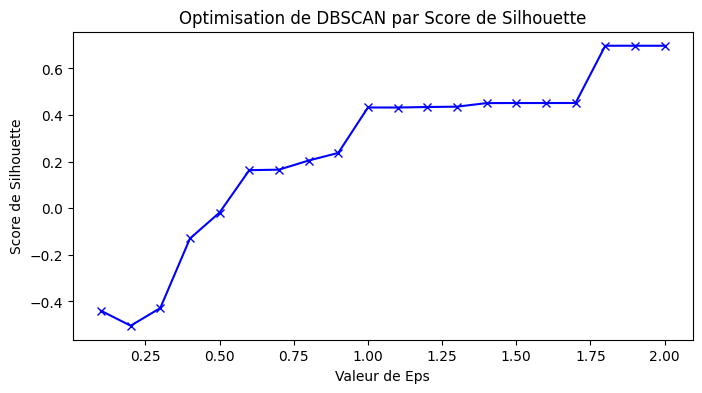

In [349]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Normalisation des données - important pour DBSCAN
x_scaled = StandardScaler().fit_transform(x_array)

# Tester différents eps
eps_values = np.linspace(0.1, 2.0, 20)  # Vous pouvez ajuster ces valeurs
min_samples = 5  # Ajustez ce paramètre selon la densité attendue de vos données
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(x_scaled)
    # Calculer le coefficient de silhouette
    if len(set(labels)) > 1:  # Éviter de calculer si un seul cluster
        score = silhouette_score(x_scaled, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Cas où il y a moins de 2 clusters valides

# Visualisation des coefficients de silhouette
plt.figure(figsize=(8, 4))
plt.plot(eps_values, silhouette_scores, 'bx-')
plt.xlabel('Valeur de Eps')
plt.ylabel('Score de Silhouette')
plt.title('Optimisation de DBSCAN par Score de Silhouette')
plt.show()


In [407]:

x_scaled = StandardScaler().fit_transform(x)

dbscan = DBSCAN(eps=1.80, min_samples=5)
clusters_dbscan = dbscan.fit_predict(x_scaled)

n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)

print(f'Nombre de clusters formés : {n_clusters}')
print(f'Points considérés comme bruit : {np.sum(clusters_dbscan == -1)}')


Nombre de clusters formés : 4
Points considérés comme bruit : 9


In [408]:
from scipy.spatial.distance import cdist

x_scaled_df = pd.DataFrame(x_scaled, index=x.index)  # Assurez-vous que les indices correspondent

# Application de DBSCAN
dbscan = DBSCAN(eps=1.80, min_samples=5)
clusters_dbscan = dbscan.fit_predict(x_scaled_df)

# Trouver les centroïdes réels (point le plus central de chaque cluster)
real_centroids = []
labels = np.unique(clusters_dbscan)

for label in labels:
    if label != -1:  # Exclure le bruit
        points_in_cluster = x_scaled_df[clusters_dbscan == label]
        # Calculer la distance entre tous les points du cluster
        pairwise_distances = cdist(points_in_cluster, points_in_cluster)
        # Somme des distances de chaque point à tous les autres points du cluster
        sum_distances = pairwise_distances.sum(axis=1)
        # Trouver l'indice du point qui a la somme des distances la plus faible
        centroid_index = np.argmin(sum_distances)
        # Trouver le centroïde correspondant dans le tableau original non normalisé
        real_centroids.append(x.loc[points_in_cluster.index[centroid_index]])

# Affichage des centroïdes
print("Centroïdes réels des clusters :")
for centroid in real_centroids:
    print(centroid)


Centroïdes réels des clusters :
age                    52.0
nb_EC                   2.0
estimation employe      7.5
city_encoded          512.0
Name: 5879, dtype: float64
age                    48.0
nb_EC                   1.0
estimation employe    374.5
city_encoded          737.0
Name: 25, dtype: float64
age                    42.0
nb_EC                  20.0
estimation employe    149.5
city_encoded           24.0
Name: 434, dtype: float64
age                    47.0
nb_EC                  31.0
estimation employe    149.5
city_encoded          669.0
Name: 2521, dtype: float64


In [409]:
test['cluster'] = clusters_dbscan

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34900\2518262710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cluster'] = clusters_dbscan


In [410]:
# Créer un DataFrame à partir de la liste des centroïdes
centroids_df = pd.DataFrame(real_centroids)
# Fusionner les centroïdes avec le DataFrame 'test' en utilisant les indices
# Assurez-vous que 'test' a un index qui peut être utilisé pour la fusion
test_centroids = test.loc[centroids_df.index]


In [411]:
test_centroids.sort_values(by='EBITDA %', ascending=False)

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
434,42.0,ANGERS,20.0,16.901408,149.5,24,2
5879,52.0,MARSEILLE,2.0,10.481481,7.5,512,0
25,48.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
2521,47.0,RENNES,31.0,3.277457,149.5,669,3


In [412]:
test['cluster'].value_counts()

cluster
 0    4515
 1      23
 2      16
 3      14
-1       9
Name: count, dtype: int64

In [382]:
test[test['cluster'] == 1]

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
11,36.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
12,60.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
13,56.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
14,55.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
15,35.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
16,43.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
17,45.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
18,45.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
19,49.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1
20,42.0,SAINT-GEORGES-SUR-BAULCHE,1.0,8.855932,374.5,737,1


# BEST IS KMEANS PROTOTYPE

In [413]:
test['cluster'] = clusters_prototype

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34900\4077035418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cluster'] = clusters_prototype


In [418]:
test.groupby('cluster')['EBITDA %'].median().sort_values(ascending=False)

cluster
2    10.020804
1     9.243697
0     8.855932
Name: EBITDA %, dtype: float64

In [435]:
df_cluster_choisi = test[test['cluster'] == 2]

In [436]:
df_cluster_choisi

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
0,56.0,AHUY,1.0,5.342020,34.5,3,2
1,45.0,AHUY,1.0,5.342020,34.5,3,2
2,49.0,AHUY,1.0,5.342020,34.5,3,2
3,42.0,AHUY,1.0,5.342020,34.5,3,2
4,52.0,AHUY,1.0,5.342020,34.5,3,2
...,...,...,...,...,...,...,...
13206,32.0,COLOMIERS,1.0,27.403315,0.0,258,2
13315,41.0,CHOISY-LE-ROI,2.0,4.100000,0.0,245,2
13686,54.0,ANGOULEME,1.0,7.568757,7.5,26,2
13687,56.0,ANGOULEME,1.0,7.568757,7.5,26,2


In [437]:
df_cluster_choisi = df_cluster_choisi[(df_cluster_choisi['EBITDA %'] < 100) & (df_cluster_choisi['EBITDA %'] > -100 )]

c:\Users\koffi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


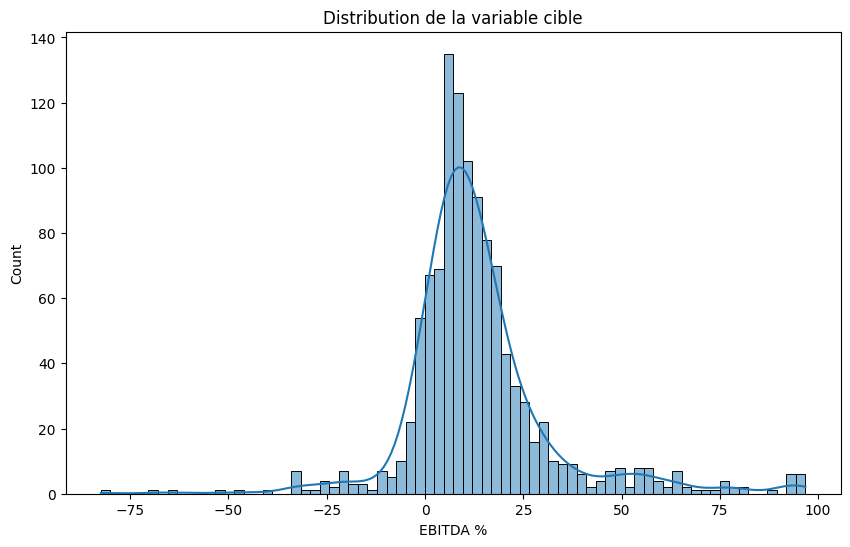

In [438]:
# y distribution plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cluster_choisi['EBITDA %'], kde=True)
plt.title('Distribution de la variable cible')
plt.show()

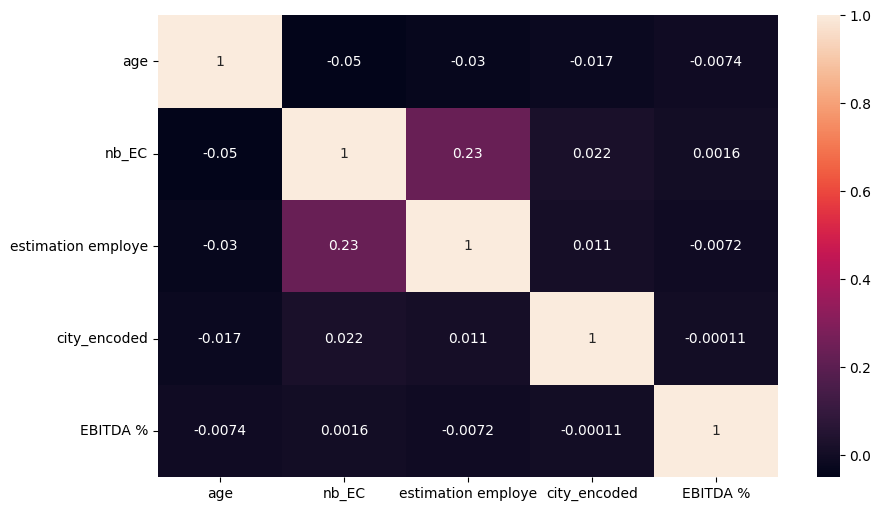

In [439]:
x['EBITDA %'] = y

plt.figure(figsize=(10, 6))
sns.heatmap(x.corr(), annot=True)
plt.show()

In [440]:
df_cluster_choisi

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
0,56.0,AHUY,1.0,5.342020,34.5,3,2
1,45.0,AHUY,1.0,5.342020,34.5,3,2
2,49.0,AHUY,1.0,5.342020,34.5,3,2
3,42.0,AHUY,1.0,5.342020,34.5,3,2
4,52.0,AHUY,1.0,5.342020,34.5,3,2
...,...,...,...,...,...,...,...
13206,32.0,COLOMIERS,1.0,27.403315,0.0,258,2
13315,41.0,CHOISY-LE-ROI,2.0,4.100000,0.0,245,2
13686,54.0,ANGOULEME,1.0,7.568757,7.5,26,2
13687,56.0,ANGOULEME,1.0,7.568757,7.5,26,2


In [453]:
df_cluster_choisi['city'].unique()

array(['AHUY', 'FOUCHERANS', 'ECHIROLLES', 'ANGERS', 'BANDRELE', 'DIJON',
       'COGNAC', 'AUCH', 'CLERMONT', 'BORDEAUX', 'ANNEMASSE', 'AUBENAS',
       'CALUIRE-ET-CUIRE', 'COURBEVOIE', 'CONDE-SUR-SARTHE', 'BERNAY',
       'CAUDAN', 'ASNIERES-SUR-SEINE', 'COUTANCES', 'EVRY', 'BALMA',
       'ANTIBES', 'CHAMPS-SUR-MARNE', 'DUNKERQUE', 'DIEPPE',
       'BRIVE-LA-GAILLARDE', 'FOIX', 'AIX-EN-PROVENCE',
       'CLERMONT-FERRAND', 'ALES', 'COULOUNIEIX-CHAMIERS', 'DOUARNENEZ',
       'DRAVEIL', 'EVIAN-LES-BAINS', 'CAUSSADE', 'BOULOGNE-BILLANCOURT',
       'BOURG-EN-BRESSE', 'BRON', 'ECOUFLANT', 'BIARRITZ',
       'DECINES-CHARPIEU', 'EVREUX', 'ANNECY', 'CHARBONNIERES-LES-BAINS',
       'BASTIA', 'BEZIERS', 'CLICHY', 'BELLEVILLE-EN-BEAUJOLAIS',
       'BRUNSTATT-DIDENHEIM', 'ANDERNOS-LES-BAINS', 'ARGENTEUIL', 'ARLES',
       'ALFORTVILLE', 'ELBEUF', 'CANNES', 'CARQUEFOU', 'CAVAILLON',
       'CEYRAT', 'BEAUCOUZE', 'BEZANNES', 'BRIGNOLES', 'BLAGNAC', 'AGEN',
       'CHADRAC', 'COLOMBES', 'ALB

In [445]:
df_cluster_choisi[df_cluster_choisi['estimation employe'] == 0].sort_values(by='EBITDA %', ascending=False)

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
3459,58.0,COURBEVOIE,1.0,96.774194,0.0,271,2
3414,76.0,DIJON,1.0,96.197719,0.0,295,2
11165,45.0,BAGNERES-DE-BIGORRE,1.0,95.833333,0.0,64,2
7293,61.0,CALAIS,3.0,94.666667,0.0,166,2
7292,56.0,CALAIS,3.0,94.666667,0.0,166,2
...,...,...,...,...,...,...,...
6630,47.0,DARDILLY,1.0,-32.191781,0.0,287,2
5249,54.0,BORDEAUX,1.0,-33.400000,0.0,118,2
7806,71.0,AMIENS,1.0,-52.601626,0.0,19,2
2164,67.0,ETAMPES,2.0,-63.354037,0.0,328,2


In [454]:
region_parisienne = ['COURBEVOIE', 'ASNIERES-SUR-SEINE', 'EVRY', 'CHAMPS-SUR-MARNE',
       'DRAVEIL','BOULOGNE-BILLANCOURT', 'EVREUX', 'CLICHY', 'ARGENTEUIL',
       'ALFORTVILLE', 'COLOMBES', 'FONTAINEBLEAU', 'EAUBONNE',
       'ENGHIEN-LES-BAINS', 'ARPAJON',
       'ARCACHON', 'CHATILLON','ANTONY',
       'CHANTILLY', 'FONTENAY-SOUS-BOIS', 'BRETIGNY-SUR-ORGE',
       'EMERAINVILLE', 'EVRY-COURCOURONNES', 'ETAMPES',  'CHAMPIGNY-SUR-MARNE', 'BOISEMONT',
       'BOUGIVAL',
       'COURDIMANCHE-SUR-ESSONNE', 
       'BEAUVAIS', 'BESANCON', 'COLOMBE',
       'CERGY', 'BOULOGNE-SUR-MER', 
       'CHARENTON-LE-PONT', 
       'BRY-SUR-MARNE','BOIS-COLOMBES', 'DEUIL-LA-BARRE', 'BUSSY-SAINT-GEORGES',
       'BOIS-LE-ROI', 'AUBERVILLIERS',
       'BAILLY-ROMAINVILLIERS',
       'FRANCONVILLE', 'CHOISY-LE-ROI', 
       'BOURG-LA-REINE', 
       'ERMONT',  'CORMEILLES-EN-PARISIS',
       'AULNAY-SOUS-BOIS', 
       'BONDY', 'CRETEIL',
       'CHENNEVIERES-SUR-MARNE', 'CARRIERES-SUR-SEINE']

In [456]:
df_region_paris = df_cluster_choisi[df_cluster_choisi['city'].isin(region_parisienne)].sort_values(by='EBITDA %', ascending=False)

In [460]:
df_region_paris[df_region_paris['EBITDA %'] > 40]

,age,city,nb_EC,EBITDA %,estimation employe,city_encoded,cluster
3459,58.0,COURBEVOIE,1.0,96.774194,0.0,271,2
5317,75.0,CHAMPIGNY-SUR-MARNE,1.0,67.226891,0.0,205,2
4260,58.0,EVRY,1.0,63.307087,0.0,332,2
10645,70.0,DEUIL-LA-BARRE,1.0,58.536585,0.0,292,2
5507,75.0,CHOISY-LE-ROI,1.0,57.015306,1.5,245,2
6145,54.0,BEAUVAIS,1.0,54.891304,1.5,82,2
3817,58.0,BOIS-COLOMBES,1.0,54.299754,0.0,107,2
9910,39.0,ASNIERES-SUR-SEINE,1.0,53.307393,4.0,46,2
8096,67.0,ETAMPES,2.0,49.529781,1.5,328,2
6858,73.0,AULNAY-SOUS-BOIS,1.0,45.983380,0.0,56,2


In [464]:
df[(df['age'].isin(df_region_paris['age'])) & (df['city'].isin(region_parisienne)) & (df['EBITDA %'] > 40)]

,First Name,Last Name,contact_type,age,date_de_naissance,linkedin_profil_url,company_name,web_site,industry,adresse,city,Postal Code,nb_employe (pappers),nb_employe (linkedin),CA,resultat_net,linkedin_company_url,ebitda,nb_EC,papers_link,telephone,EBITDA %
3459,Alain,Perroux,Accountant,58.0,10/1965,https://www.linkedin.com/in/alain-perroux?mini...,EY AUDIT & CONSEIL,NaN,Accounting,"PARIS LA DEFENSE 1, 1 PL DES SAISONS, 92400 CO...",COURBEVOIE,92400.0,0 salarié,NaN,15500000.0,84900000.0,NaN,15000000.0,1.0,https://www.pappers.fr/entreprise/ey-audit-&-c...,NaN,96.774194
3817,Laurent,Krier,Accountant,58.0,08/1965,NaN,KLP AUDIT ET CONSEIL,NaN,Accounting,"4 ALL LOUIS BLERIOT, 92270 BOIS-COLOMBES",BOIS-COLOMBES,92270.0,0 salarié,NaN,407000.0,238000.0,https://www.linkedin.com/company/klp-audit-et-...,221000.0,1.0,https://www.pappers.fr/entreprise/klp-audit-et...,01 47 82 27 46,54.299754
4260,Christophe,Racaud,Accountant,58.0,09/1965,NaN,FID.ESS AUDIT,NaN,Accounting,"Z.I DU BOIS CHALAND CE 2907 LISSES, 18 RUE DU ...",EVRY,91029.0,0 salarié,NaN,63500.0,4880.0,https://www.linkedin.com/company/fid.ess-audit...,40200.0,1.0,https://www.pappers.fr/entreprise/fid.ess-audi...,01 69 91 32 00,63.307087
5317,Jean,Menoni,Accountant,75.0,09/1948,NaN,JCM EXPERTISE CONSEIL,NaN,Accounting,"153 QUAI GALLIENI, 94500 CHAMPIGNY-SUR-MARNE",CHAMPIGNY-SUR-MARNE,94500.0,0 salarié,NaN,35700.0,30100.0,https://www.linkedin.com/company/jcm-expertise...,24000.0,1.0,https://www.pappers.fr/entreprise/jcm-expertis...,01 48 81 37 23,67.226891
5506,Eric,Payet,Accountant,56.0,05/1967,NaN,SIRIUS,https://www.sirius-expertise.fr/,Accounting,"38 RUE DE LA STATION, 95130 FRANCONVILLE",FRANCONVILLE,95130.0,Au moins 1 salarié,0-1 employés,90900.0,29700.0,https://www.linkedin.com/company/sirius-expert...,36600.0,1.0,https://www.pappers.fr/entreprise/sirius-52098...,02 31 46 21 71,40.264026
5507,Abdelhaq,Daoud,Accountant,75.0,04/1948,NaN,ABDEC,NaN,Accounting,"14 BD DES ALLIES, 94600 CHOISY-LE-ROI",CHOISY-LE-ROI,94600.0,Entre 1 et 2 salariés,NaN,78400.0,36800.0,NaN,44700.0,1.0,https://www.pappers.fr/entreprise/abdec-520993825,09 61 39 15 45,57.015306
6145,Jean-francois,Flaud,Accountant,54.0,07/1969,NaN,EXALIANCE,NaN,Accounting,"11 AV PIERRE BEREGOVOY, 60000 BEAUVAIS",BEAUVAIS,60000.0,Entre 1 et 2 salariés,NaN,230000.0,101000.0,https://www.linkedin.com/company/exaliance/about/,126250.0,1.0,https://www.pappers.fr/entreprise/exaliance-53...,03 44 49 63 52,54.891304
6858,Pierre,Illouz,Accountant,73.0,03/1951,https://www.linkedin.com/in/pierre-illouz-0834...,CABINET PIERRE ILLOUZ,NaN,Accounting,"1 RUE MARYSE BASTIE, 93600 AULNAY-SOUS-BOIS",AULNAY-SOUS-BOIS,93600.0,0 salarié,0-1 employés,36100.0,13500.0,https://www.linkedin.com/company/cabinet-pierr...,16600.0,1.0,https://www.pappers.fr/entreprise/cabinet-pier...,01 48 68 28 57,45.983380
8096,Rene,Hans,Accountant,67.0,03/1957,NaN,HANS ET ASSOCIES ILE-DE-FRANCE,NaN,Accounting,"24 AV DU 8 MAI 1945, 91150 ETAMPES",ETAMPES,91150.0,Entre 1 et 2 salariés,NaN,63800.0,116000.0,NaN,31600.0,2.0,https://www.pappers.fr/entreprise/hans-et-asso...,01 44 90 82 10,49.529781
9910,Fabrice,Heuvrard,Accountant,39.0,01/1985,https://www.linkedin.com/search/results/people...,CABINET FABRICE HEUVRARD,NaN,Accounting,"ASNIERES SUR SEINE, 7 RUE MORTINAT, 92600 ASNI...",ASNIERES-SUR-SEINE,92600.0,Entre 3 et 5 salariés,NaN,257000.0,106000.0,https://www.linkedin.com/company/cabinet-fabri...,137000.0,1.0,https://www.pappers.fr/entreprise/cabinet-fabr...,06 10 23 32 99,53.307393
